# Analysis and prediction of sales

<h3>Objectives</h3>

* Analyze sales and interpret insights from the dataset
* Forcast sales based on the data driven result

# 1. Import libraries and load dataset

In [1]:
# import analytical libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory
# all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv


# 2. Understand data

<h3>About the data source</h3>

Walmart has multiple stores across the country and each store is facing tasks in managing its own inventory to supply their customers' demand.

Sales data attributes:

* Store: store number
* Date: week of sales
* Weekly_Sales: sales for the given store in that week
* Holiday_Flag: if it is holiday week or not
* Temperature: temperature on the day of the sales
* Fuel_price: cost of the fuel in the region
* CPI: consumer price index
* Unemployment: unemplyment rate


[Data Source](https://www.kaggle.com/datasets/asahu40/walmart-data-analysis-and-forcasting)

In [2]:
df = pd.read_csv("/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 3. Preprocessing: Inspect and clean data

In [3]:
# First, let's check the information of the dataset such as rangeindex, columns, data types, null value counts and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Inspect if there are any null values in the dataset
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Check the duplicates in the dataset
df.duplicated().sum()

0

# 4. Preprocessing: Wrangling data

In [6]:
# Check the sales if it was holiday sales or not. if yes: 1, otherwise: 0
df['Holiday_Flag'].unique()

array([0, 1])

In [7]:
# The statistical distribution of numerical variables in the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Split 'Date' column to day, month, and year 
new_df=pd.concat([df.drop('Date', axis = 1), 
           (df.Date.str.split("-").str[:3].apply(pd.Series)
          .rename(columns={0:'Day', 1:'Month', 2:'Year'}))], axis = 1)
new_df.sample(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
4214,30,435102.20,0,68.36,3.907,215.383478,7.931,20,05,2011
5118,36,331026.11,0,73.95,3.934,220.120412,6.989,06,04,2012
5914,42,499081.79,0,53.03,3.231,127.580032,8.744,28,01,2011
1999,14,1639585.61,0,54.47,4.000,192.327265,8.667,12,10,2012
1813,13,2760346.71,0,27.85,3.282,129.898065,6.392,16,12,2011


In [9]:
# use value_counts to see the total 
new_df['Year'].value_counts()

Year
2011    2340
2010    2160
2012    1935
Name: count, dtype: int64

In [10]:
# let's look at insights to see weekly sales
print("Total weekly sales of entrie stores: ", new_df['Weekly_Sales'].sum(), '\n')
print("Average sales of entire stores: ", new_df['Weekly_Sales'].mean(), '\n')
print("Top store number of sales: ", new_df.groupby('Store')['Weekly_Sales'].sum().idxmax(), '\n')
print("Store number of the lowest sales: ", new_df.groupby('Store')['Weekly_Sales'].sum().idxmin())

Total weekly sales of entrie stores:  6737218987.11 

Average sales of entire stores:  1046964.8775617715 

Top store number of sales:  20 

Store number of the lowest sales:  33


In [11]:
# Compare sales during holiday week and regular week 
print("Holiday counts: ", new_df[new_df['Holiday_Flag']==1]['Holiday_Flag'].count(), '\n')
print("Total sales during holiday week: ", new_df[new_df['Holiday_Flag']==1]['Weekly_Sales'].sum(), '\n')
print("Total sales during regular week: ", new_df[new_df['Holiday_Flag']==0]['Weekly_Sales'].sum())

Holiday counts:  450 

Total sales during holiday week:  505299551.56 

Total sales during regular week:  6231919435.55


In [12]:
# Calculate correlation 
print("Correlation between Weekly_Sales and Fuel_Price: ", new_df['Weekly_Sales'].corr(new_df['Fuel_Price']), '\n')
print("Correlation between Weekly_Sales and Temperature: ", new_df['Weekly_Sales'].corr(new_df['Temperature']), '\n')
print("Correlation between Weekly_Sales and CPI: ", new_df['Weekly_Sales'].corr(new_df['CPI']))

Correlation between Weekly_Sales and Fuel_Price:  0.009463786314475114 

Correlation between Weekly_Sales and Temperature:  -0.06381001317946956 

Correlation between Weekly_Sales and CPI:  -0.07263416204017631


# 5. Analyze data

In [13]:
# Let's see the correlation matrix with numerical variables
co_df=new_df.corr()
co_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,1.478526e-15,2.910676e-15,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.740946e-02,7.614332e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,4.452608e-02,1.229958e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,2.697332e-02,2.358618e-01,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,2.807253e-02,-4.215590e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,2.684300e-03,4.979672e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-4.233293e-03,-1.274559e-02,-2.418135e-01
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,1.000000e+00,1.519184e-02,6.405867e-03
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,1.519184e-02,1.000000e+00,-1.944645e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,6.405867e-03,-1.944645e-01,1.000000e+00


<Axes: >

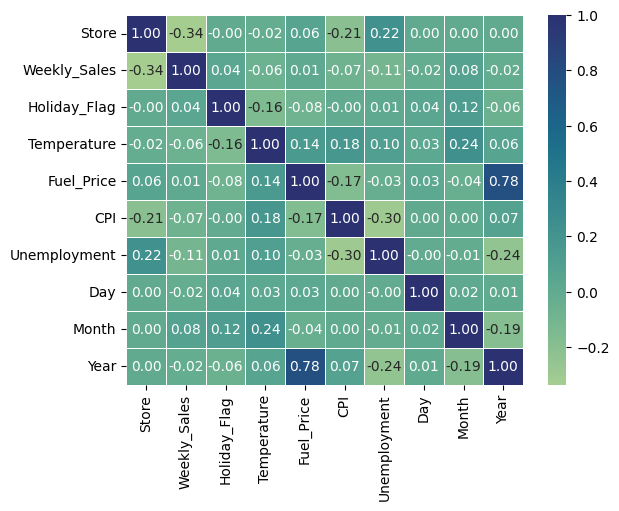

In [14]:
import matplotlib as plt
import seaborn as sns

#Visualization of correlation matrix
sns.heatmap(co_df, annot=True, fmt = '.2f', linewidth=.5, cmap="crest")
#plt.title("Correlation Matrix", fontsize=12)
#plt.show()

# 6. Visualize data

In [15]:
yearly_sales = new_df.groupby('Year').agg({'Weekly_Sales':'sum'}).reset_index()
yearly_sales

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


<Axes: xlabel='Year', ylabel='Weekly_Sales'>

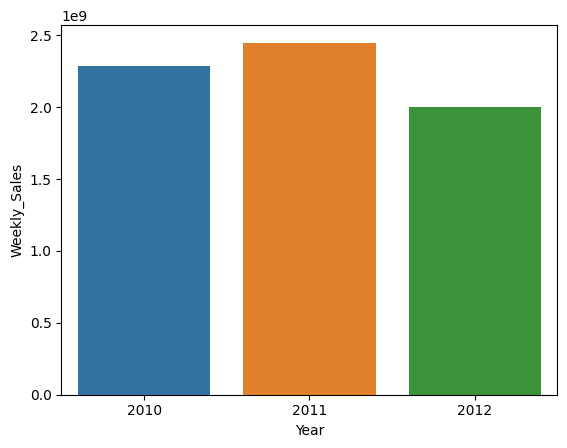

In [16]:
sns.barplot(x="Year", y='Weekly_Sales', data=yearly_sales)

In [17]:
table = pd.pivot_table(new_df, values='Weekly_Sales', index=['Month'],
                       columns=['Year'], aggfunc="sum", fill_value=0)
table

Year,2010,2011,2012
Month,,,
01,0.000000e+00,1.637040e+08,1.688945e+08
02,1.903330e+08,1.863313e+08,1.920636e+08
03,1.819198e+08,1.793564e+08,2.315097e+08
04,2.314124e+08,2.265265e+08,1.889209e+08
05,1.867109e+08,1.816482e+08,1.887665e+08
06,1.922462e+08,1.897734e+08,2.406103e+08
07,2.325801e+08,2.299114e+08,1.875095e+08
08,1.876401e+08,1.885993e+08,2.368508e+08
09,1.772679e+08,2.208477e+08,1.806455e+08


<Axes: >

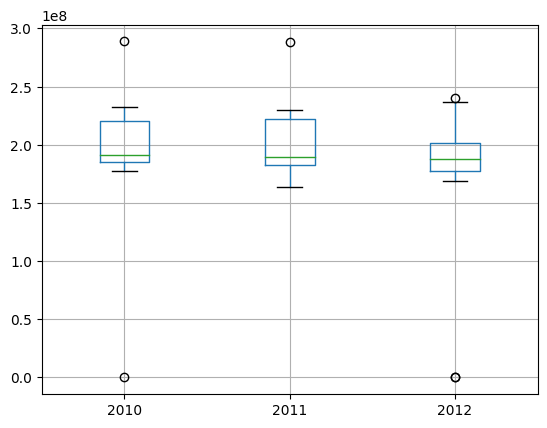

In [18]:
# Plot the responses for different events and regions
table.boxplot()

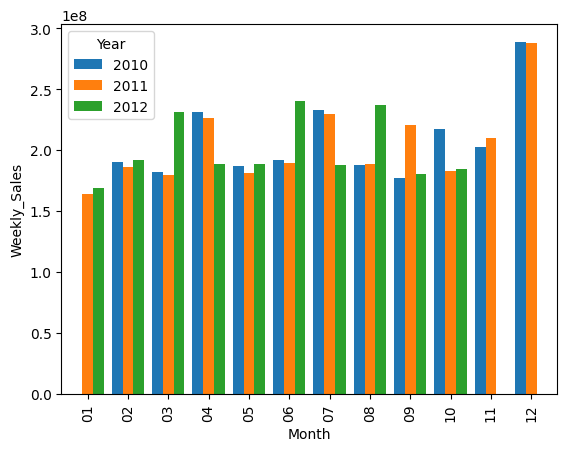

In [19]:
#fig, axs = plt.subplots(figsize=(12, 6))
#ax = df.T.plot(kind='bar', ylabel='Murder Rate') #'T' return legend of month
ax = table.plot(kind='bar', ylabel='Weekly_Sales', linewidth=4, width=0.8) 

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

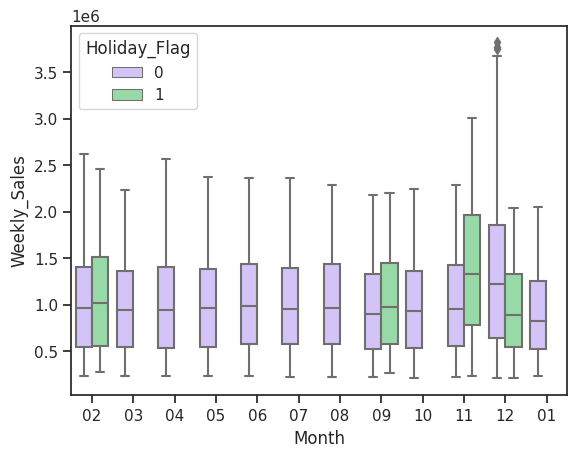

In [20]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Month", y="Weekly_Sales",
            hue="Holiday_Flag", palette=["m", "g"],
            data=new_df)

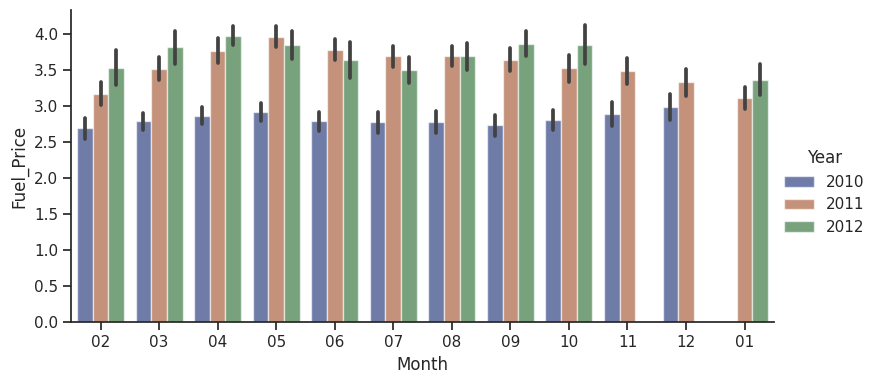

In [21]:
sns.catplot(kind='bar', x="Month", y="Fuel_Price", hue="Year", data=new_df, errorbar="sd", palette="dark", alpha=.6, height=4, aspect=2)
# control width and height of bar using 'height' and 'aspect'

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

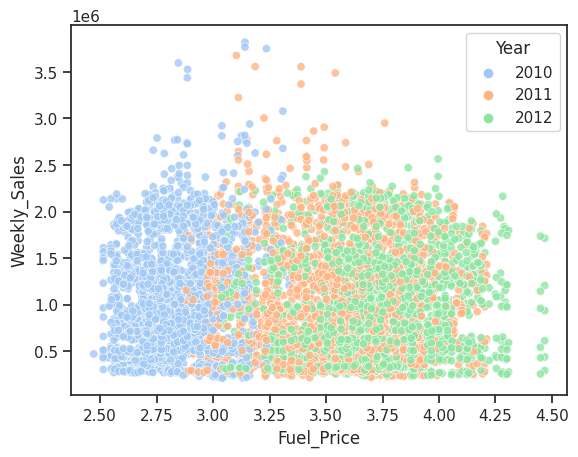

In [22]:
#sns.catplot(kind='line', x="Fuel_Price", y="Weekly_Sales", hue="Year", data=new_df, errorbar="sd", palette="dark", alpha=.6, height=4, aspect=2)
#p = new_df.Plot(new_df, "Fuel_Price", "Weekly_Sales", color="Year", linestyle="event")
#p.add(so.Line(), so.Agg())

sns.scatterplot(data=new_df, x="Fuel_Price", y="Weekly_Sales", hue="Year", alpha=.8)

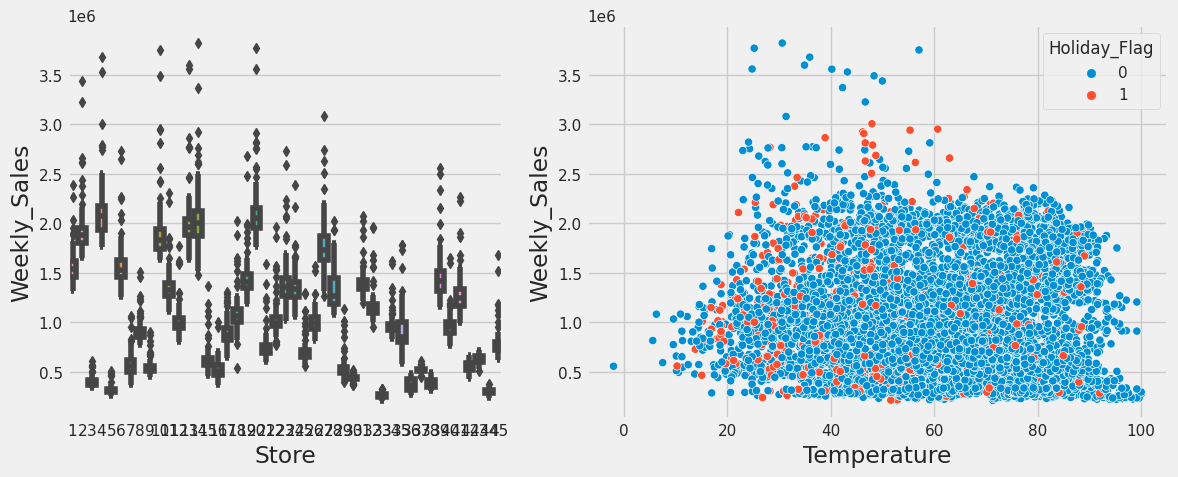

In [23]:
#
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

f, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw=dict(width_ratios=[3, 4]))#control width of graph1, 2
sns.boxplot(data=new_df, x='Store', y="Weekly_Sales", ax=axs[0])
sns.scatterplot(data=new_df, x="Temperature", y="Weekly_Sales", hue="Holiday_Flag", ax=axs[1])
f.tight_layout()

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

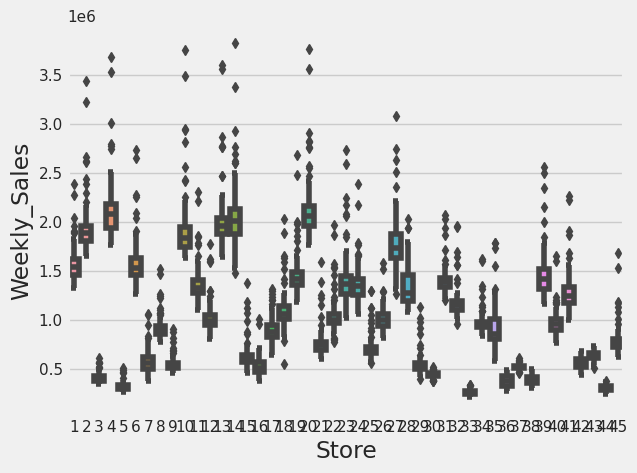

In [24]:
#
sns.boxplot(data=new_df, x='Store', y='Weekly_Sales', width=0.8)

# 7. Build model

Reference